In [15]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
import random
import numpy as np
import matplotlib.pyplot as plt

from neural_network import activations, costs, nn as neural_network, layers, gui
from neural_network.data import get_mnist_data, get_augmented_mnist_data, train_test_split
from neural_network.filters import ALL_FILTERS
from neural_network.data import get_mnist_data
from neural_network.layers import Conv2D
from neural_network.layers import MaxPooling2D
from neural_network import filters

ModuleNotFoundError: No module named 'albumentations'

In [2]:
x, y = get_mnist_data(2560)

# Neural Network 

## Exploring data

### MNIST Dataset

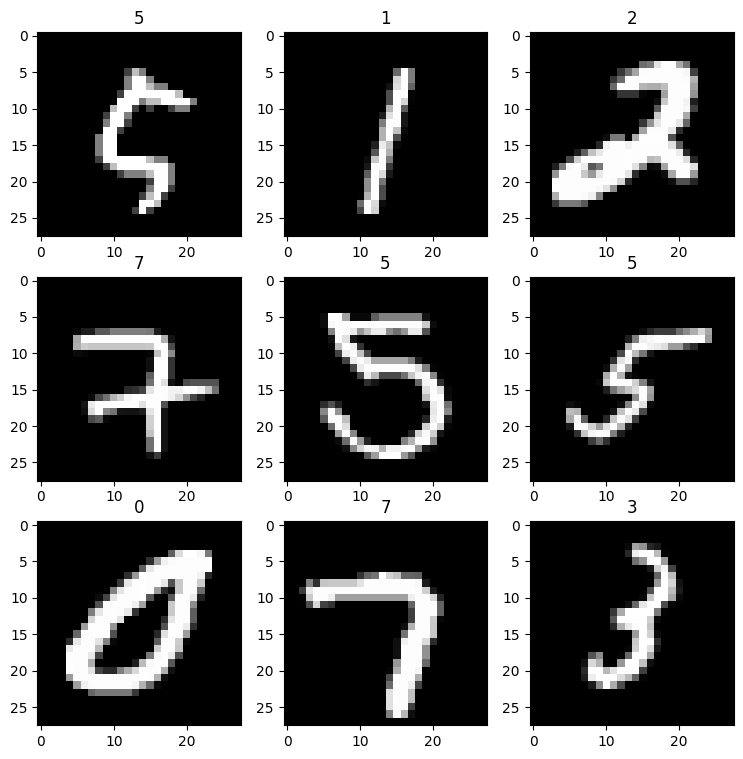

In [3]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
axs = axs.flatten()


for i in range(9):
    random_index = random.randint(0, len(x) - 1)
    axs[i].imshow(x[random_index], cmap='gray')
    axs[i].set_title(y[random_index])

plt.show()

### Conv2D

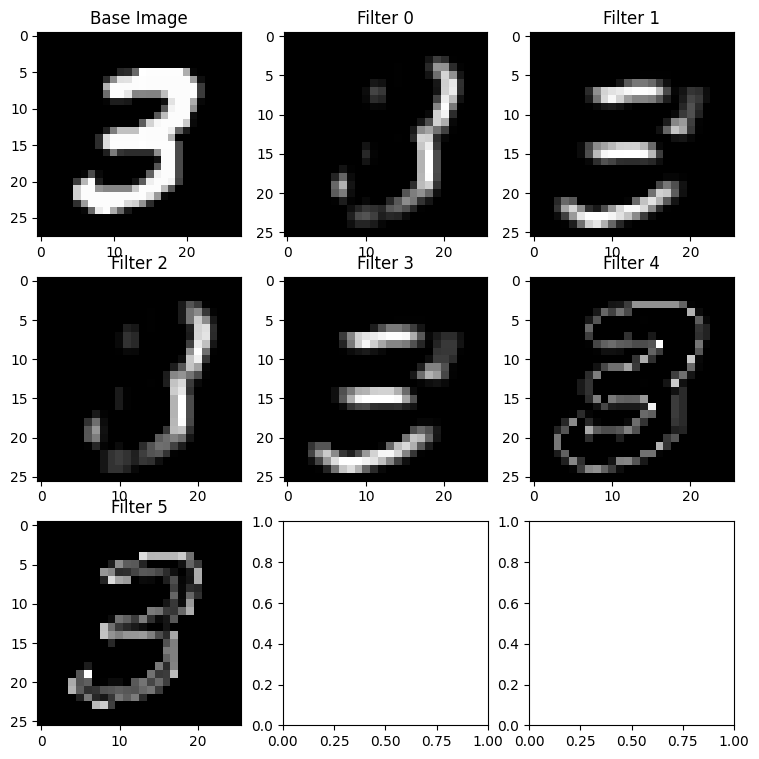

In [4]:
img = x[7]

conv2d = Conv2D(filters.ALL_FILTERS)
output = conv2d.calculate_outputs(img)

# Display the original and transformed images side by side
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
axs = axs.flatten()
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Base Image')

for i, filter in enumerate(filters.ALL_FILTERS):
    axs[i+1].imshow(output[:, :, i], cmap='gray')
    axs[i+1].set_title(f'Filter {i}')

plt.show()

### MaxPooling2D

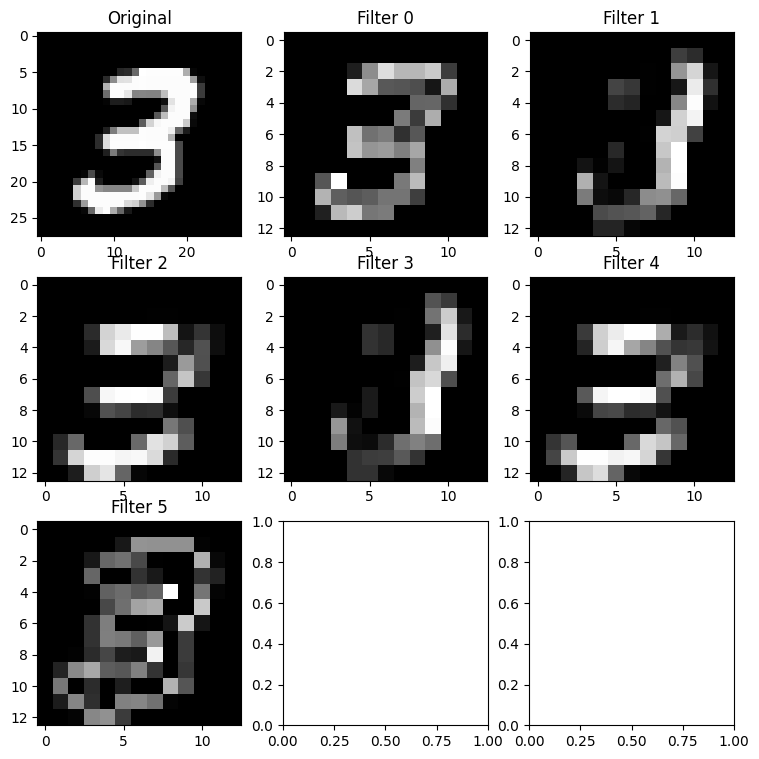

In [6]:
img = x[7]

conv2d = Conv2D(filters.ALL_FILTERS)
max_pooling = MaxPooling2D()

nparay = conv2d.calculate_outputs(img)
output = max_pooling.calculate_outputs(nparay)

# Display the original and transformed images side by side
fig, axs = plt.subplots(3,3, figsize=(9,9))
axs = axs.flatten()
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')

for i, filter in enumerate(filters.ALL_FILTERS):
    axs[i+1].imshow(output[:, :, i-1], cmap='gray')
    axs[i+1].set_title(f'Filter {i}')

plt.show()

### Training the model


Training ...
Epoch 1/3
- Progress: [██████████████████████████████████████████████████] Cost: 1.2436 | Accuracy: 0.6289, | Time: 25.41s
Epoch 2/3
- Progress: [██████████████████████████████████████████████████] Cost: 0.8091 | Accuracy: 0.7402, | Time: 22.76s
Epoch 3/3
- Progress: [██████████████████████████████████████████████████] Cost: 0.7232 | Accuracy: 0.7539, | Time: 24.47s


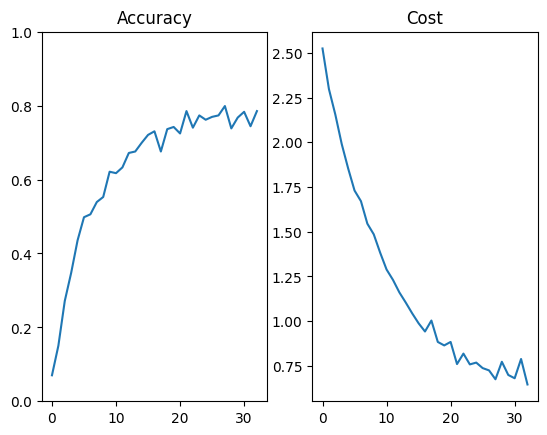

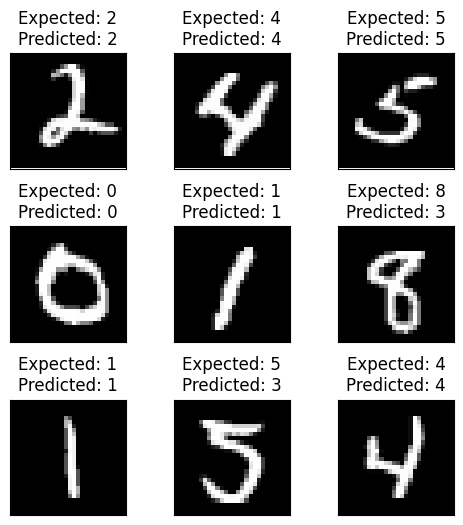

In [5]:
nn = neural_network.NeuralNetwork([
    layers.Conv2D(ALL_FILTERS),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(13 * 13 *6, 128, activations.ReLU),
    layers.Dense(128, 10, activations.Softmax),
])

one_hot = lambda y: np.eye(10)[y]

y = np.array([one_hot(i) for i in y])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
train_data = np.array(list(zip(x_train, y_train)), dtype=object)    
test_data = np.array(list(zip(x_test, y_test)), dtype=object)

train_accuracies, train_costs = nn.train(
    train_data, 
    test_data, 
    learn_rate=0.2, 
    cost=costs.CategoricalCrossEntropy, 
    batch_size=32, 
    epochs=3, 
    save=False, 
    file_name="neural_network.pkl", 
    validate_per_batch=True,
    validate_interval=6,
    learn_method="threading",
)

#  plot train accuracies, costs
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(train_accuracies)
ax1.set_title('Accuracy')
ax1.set_ylim(0, 1)
ax2.plot(train_costs)
ax2.set_title('Cost')

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i in range(3):
    for j in range(3):
        k = np.random.randint(len(test_data))
        axes[i, j].imshow(test_data[k][0].reshape((28, 28)), cmap='gray')
        expected = np.argmax(test_data[k][1])
        predicted = np.argmax(nn.predict(test_data[k][0]))
        axes[i, j].set_title(f"Expected: {expected}\nPredicted: {predicted}")
        axes[i, j].set_xticklabels([])
        axes[i, j].set_yticklabels([])
        axes[i, j].tick_params(axis='both', which='both', length=0)
fig.subplots_adjust(hspace=0.5)
plt.show()
